# **Metrics**

In supervised machine learning, regression metrics are used to evaluate the performance of regression models by comparing predicted values to actual values. Each metric measures a specific aspect of model accuracy or performance. Here are the most commonly used regression metrics, along with detailed explanations:

## 1. Mean Absolute Error (MAE)

- Formula: $MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y_i}|$

### Explanation:

- MAE calculates the average absolute difference between the actual and predicted values.

- It provides an intuitive sense of how much the predictions deviate, on average, from the true values.

- Scale: Same as the target variable.

- Interpretation: Lower MAE indicates better model performance.

## 2. Mean Squared Error (MSE)

- Formula: $MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2$

### Explanation:


- MSE measures the average squared difference between the actual and predicted values.

- It is sensitive to outliers and large errors.

- It penalizes larger errors more than smaller ones because of the squaring operation.

- Scale: Same as the square of the target variable.

- Interpretation: Lower MSE is better, but it is sensitive to outliers.

## 3. Root Mean Squared Error (RMSE)

- Formula: $RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2}$
- 
### Explanation:

- RMSE is the square root of the mean squared error. bringing the scale back to the same as the target variable.

- It provides a more interpretable measure of how much the predictions deviate from the true values.


- Scale: Same as the square root of the target variable.

- Interpretation: Lower RMSE is better, but it is sensitive to outliers.

## 4. R-squared (Coefficient of Determination)

- Formula: $R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y_i})^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$

### Explanation:

- R-squared measures the proportion of the variance in the target variable that is explained by the model.

- It ranges from 0 to 1, where 1 indicates perfect prediction.

- Scale: Same as the target variable.

- Interpretation: Higher R-squared indicates better model performance.

## 5. Adjusted R-squared

- Formula: $R^2_{adj} = 1 - \frac{(1 - R^2) \times (n - 1)}{n - p - 1}$

### Explanation:

- Adjusted R-squared accounts for the number of independent variables in the model.

- It provides a more accurate measure of model performance when comparing models with different numbers of independent variables.

- Scale: Same as the target variable.

- Interpretation: Higher adjusted R-squared indicates better model performance.

## 6. Mean Absolute Percentage Error (MAPE)

- Formula: $MAPE = \frac{1}{n} \sum_{i=1}^n \frac{|y_i - \hat{y_i}|}{|y_i|}$

### Explanation:

- MAPE measures the average percentage difference between the actual and predicted values.

- It is sensitive to outliers and large errors.

- It provides a relative measure of prediction accuracy.

- Scale: Same as the target variable.

- Interpretation: Lower MAPE is better, but it is sensitive to outliers.

----

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Data/placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


<Axes: xlabel='package', ylabel='Density'>

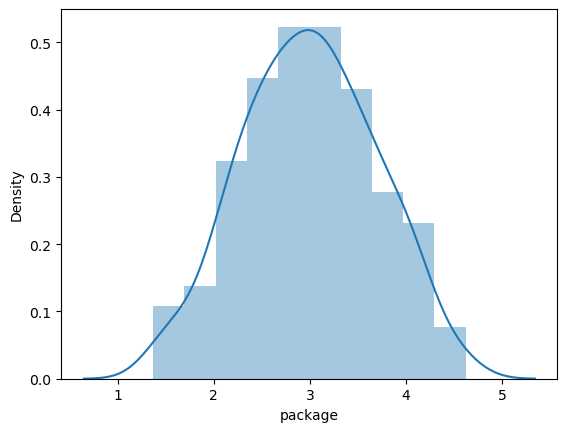

In [3]:
sns.distplot(df["package"])

In [9]:
#plt.boxplot(df["Target"])
#plt.show()

In [10]:
numerical_col = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']
numerical_col

['cgpa', 'package']

In [11]:
simple_linear = df.copy()

In [12]:
X = simple_linear['cgpa'].values.reshape(-1, 1)  # Reshaping into a 2D array
y = simple_linear['package']

In [13]:
## Split the Data into train and test
from sklearn.model_selection import train_test_split # type: ignore

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression # type: ignore

model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred

array([2.79941586, 3.15292804, 3.21564795, 2.41169282, 3.54065108,
       3.78012708, 3.18143709, 2.56564168, 3.19284071, 3.50644023,
       1.93274083, 2.37178016, 3.70030175, 2.77660862, 3.4893348 ,
       3.06169909, 2.34897292, 3.22134976, 2.20072587, 3.32968414,
       2.47441273, 2.91915386, 3.33538594, 2.89064481, 3.35249137,
       2.2178313 , 1.44808703, 2.73099415, 3.19854252, 2.34897292,
       3.75731984, 2.97617195, 3.69459994, 2.99327738, 2.61125615,
       3.36389499, 2.49721996, 3.09020814, 4.18495554, 2.97617195,
       3.11301538, 3.13012081, 3.93407593, 2.74239777, 1.93844264,
       2.97047014, 3.09590995, 3.28406966, 1.78449379, 3.35819318,
       2.34897292, 2.86783757, 3.51784385, 2.38888558, 3.07880452,
       3.83144336, 3.52924746, 3.40380766, 2.97047014, 3.07310271])

In [18]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

In [19]:
mae

0.2606898249919377

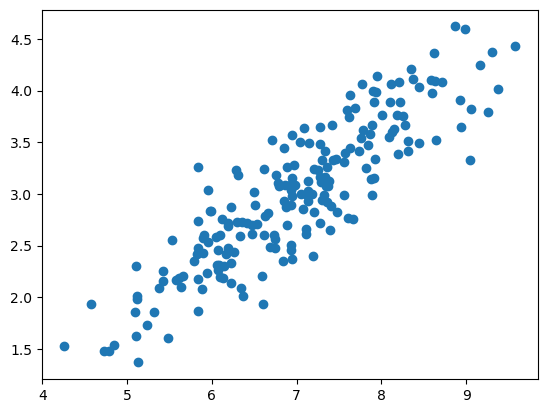

In [20]:
plt.scatter(x=df['cgpa'], y=df['package'])

In [21]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

0.09995369482155111

In [22]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.3161545426236212

In [23]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.7525945592908275

In [24]:
def adjusted_r_squared(r_squared, n, p):
    """
    Calculate the Adjusted R-squared.

    Parameters:
    r_squared (float): The R-squared value of the model.
    n (int): The number of observations (data points).
    p (int): The number of predictors (independent variables).

    Returns:
    float: Adjusted R-squared value.
    """
    return 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

In [25]:
simple_linear.shape

(200, 2)

In [26]:
num = len(y_pred)

In [27]:
num

60

In [28]:
r_squared = 0.85  # Replace with your model's R-squared value
n = 200           # Replace with the number of data points
p = 60  

In [29]:
adjusted_r2 = adjusted_r_squared(r2, n, p)
print(f"Adjusted R-squared: {adjusted_r2}")

Adjusted R-squared: 0.6458008438767961
